Logistics Regression Project

 Business Problem: Predict delivery time (hours) based on distance (km)

In [1]:
# 1. import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# 2.dataset creation
np.random.seed(42)

In [3]:
#Generate 500+ record
n = 500
distance = np.random.randint(5, 200, n)  # Independent variable X
# Equation: time = 0.04*distance + 0.5 + noise
noise = np.random.normal(0, 1, n)
delivery_time = 0.04 * distance + 0.5 + noise  # Dependent variable Y


In [4]:
#Create dataframe
data = pd.DataFrame({"Distance_km": distance, "Delivery_Time_hr": delivery_time})

print("Dataset shape:", data.shape)
print(data.head())


Dataset shape: (500, 2)
   Distance_km  Delivery_Time_hr
0          107          4.542608
1          184          9.732006
2           97          4.360558
3           19          0.327408
4          111          3.645058


In [5]:
# 3.Exploratory data analysis
print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())



Summary Statistics:
       Distance_km  Delivery_Time_hr
count   500.000000        500.000000
mean    105.092000          4.710175
std      56.201858          2.438950
min       5.000000         -1.504720
25%      56.000000          2.713306
50%     108.000000          4.769280
75%     151.250000          6.669568
max     199.000000         10.983572

Missing Values:
Distance_km         0
Delivery_Time_hr    0
dtype: int64


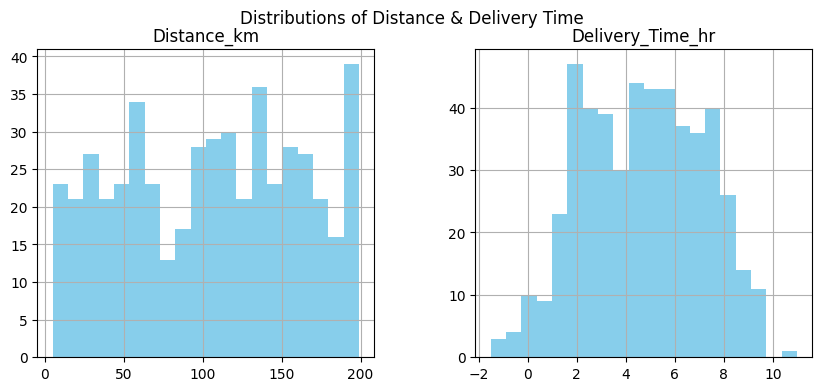

In [6]:
# Histogram
data.hist(figsize=(10,4), bins=20, color="skyblue")
plt.suptitle("Distributions of Distance & Delivery Time")
plt.show()


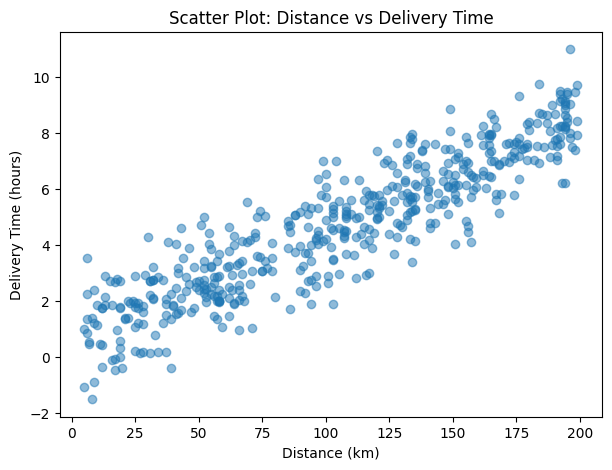

In [7]:
#Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(data["Distance_km"], data["Delivery_Time_hr"], alpha=0.5)
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (hours)")
plt.title("Scatter Plot: Distance vs Delivery Time")
plt.show()


In [8]:
# 4.Linear regression using gradient decent
X = data["Distance_km"].values
y = data["Delivery_Time_hr"].values

# Normalize features (helps gradient descent converge faster)
X_norm = (X - X.mean()) / X.std()

# Parameters
m = 0.0   # slope
b = 0.0   # intercept
alpha = 0.01  # learning rate
iterations = 1000

n = len(X)
loss_history = []


In [9]:
# Gradient descent loop
for _ in range(iterations):
    y_pred = m * X_norm + b
    error = y_pred - y
    loss = (1/n) * np.sum(error**2)   # MSE
    loss_history.append(loss)

    # Gradients
    dm = (2/n) * np.sum(error * X_norm)
    db = (2/n) * np.sum(error)

    # Update
    m -= alpha * dm
    b -= alpha * db

print("\nGradient Descent Results:")
print("Slope (m):", m)
print("Intercept (b):", b)



Gradient Descent Results:
Slope (m): 2.2072415611289316
Intercept (b): 4.710174636390262


In [10]:
#5. prediction and evaluation
y_pred = m * X_norm + b

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("\nModel Evaluation:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)



Model Evaluation:
MAE : 0.8140804988239378
MSE : 1.0646670140350398
RMSE: 1.0318270271877161
R²  : 0.820659943191278


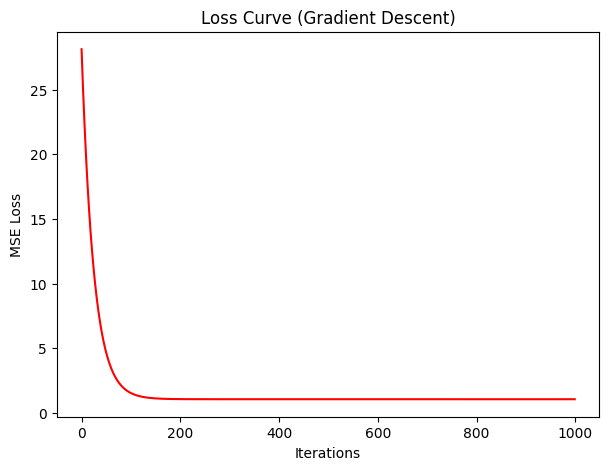

In [11]:
# Visualizations
# Loss curve
plt.figure(figsize=(7,5))
plt.plot(loss_history, color="red")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve (Gradient Descent)")
plt.show()

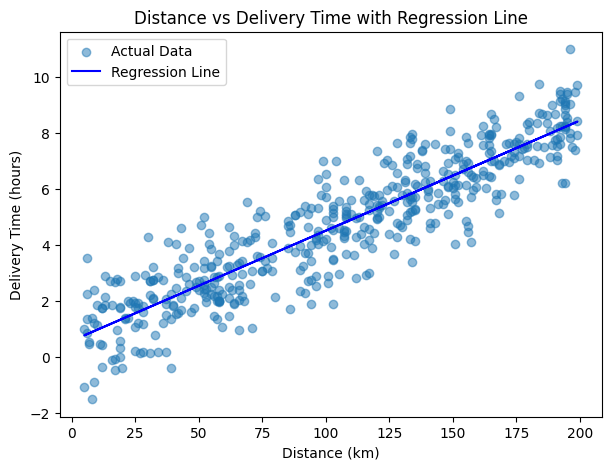

In [12]:
# Regression line vs Actual
plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.5, label="Actual Data")
plt.plot(X, y_pred, color="blue", label="Regression Line")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (hours)")
plt.title("Distance vs Delivery Time with Regression Line")
plt.legend()
plt.show()


Buisness Insights:

The slope indicates how much delivery time increases with each additional km.
Example: if slope ≈ 0.04, it means every extra km adds ~2.4 minutes.

The intercept represents base delivery overhead (loading, processing time), even when distance is small.

A high R² value (close to 1) suggests distance strongly explains delivery time.

However, in real-world cases, other factors (traffic, weather, vehicle type) may also influence delivery time.

Coclusion:

The model confirms that distance is a key driver of delivery time.

Regression with gradient descent worked well, achieving low error metrics.

The project builds confidence in single-variable regression.

For future improvement, additional variables like traffic and road conditions should be considered to make predictions more accurate.